# Librerias a importar que se utilizaran 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels.api as sm

In [4]:
%ls

 07_02_pie_box_scatter_bubble.ipynb   requirements.txt
 Canada.xlsx                          runtime.txt
 DanielRizzo_Reto.ipynb               rym_top_5000_all_time.csv
 nhanes_2015_2016.csv                'Untitled Folder'/
 README.md                            welcome_binder.ipynb
 requierementsEXL


Importamos la base de datos a leer

In [5]:
df = pd.read_csv("rym_top_5000_all_time.csv")
df.columns

Index(['Ranking', 'Album', 'Artist_Name', 'Release Date', 'Genres',
       'Descriptors', 'Average_Rating', 'Number_of_Ratings',
       'Number_of_Reviews'],
      dtype='object')

# 1. ¿Cual es nuestra variable de interés? y su explicación

In [6]:
df.head()

,Ranking,Album,Artist_Name,Release Date,Genres,Descriptors,Average_Rating,Number_of_Ratings,Number_of_Reviews
0,1,OK Computer,Radiohead,16-Jun-97,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2,Wish You Were Here,Pink Floyd,12-Sep-75,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3,In the Court of the Crimson King,King Crimson,10-Oct-69,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4,Kid A,Radiohead,3-Oct-00,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5,To Pimp a Butterfly,Kendrick Lamar,15-Mar-15,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


# Conclusiones:
La variable a pronosticar es la de average rating.
Se busca generar un modelo de regresión simple para generar un pronostico del average rating del album usando las demas variabeles. 

# 2. Información de variables

registros de cada variable

In [7]:
df.count


<bound method DataFrame.count of       Ranking                                         Album  \
0           1                                   OK Computer   
1           2                            Wish You Were Here   
2           3              In the Court of the Crimson King   
3           4                                         Kid A   
4           5                           To Pimp a Butterfly   
...       ...                                           ...   
4995     4996                                     Gracious!   
4996     4997                          Knights of the Cross   
4997     4998             (Listen For) The Rag and Bone Man   
4998     4999  Hymnen für elektronische und konkrete Klänge   
4999     5000                        Adventures in Paradise   

                                            Artist_Name Release Date  \
0                                             Radiohead    16-Jun-97   
1                                            Pink Floyd    12-Sep-

tipos de variable


In [8]:
df.dtypes


Ranking                int64
Album                 object
Artist_Name           object
Release Date          object
Genres                object
Descriptors           object
Average_Rating       float64
Number_of_Ratings     object
Number_of_Reviews      int64
dtype: object

variables con registros en blanco


In [9]:
df.isna().sum()

Ranking                0
Album                  0
Artist_Name            0
Release Date           0
Genres                 0
Descriptors          114
Average_Rating         0
Number_of_Ratings      0
Number_of_Reviews      0
dtype: int64

Se eliminan los registros en blanco ya que no son relevantes para el análisis

In [10]:
dflimpio = df.dropna()

Conteo de los registros en blanco con una base de datos limpia


Nuevo registro de números de cada variable, ahora en limpio

In [11]:
dflimpio.count()

Ranking              4886
Album                4886
Artist_Name          4886
Release Date         4886
Genres               4886
Descriptors          4886
Average_Rating       4886
Number_of_Ratings    4886
Number_of_Reviews    4886
dtype: int64

# Conclusiones
Se puede analizar que existen 9 variables distintas dentro de la base de datos 
2 floats
6 categóricas
1 integer
Se limpiaron los registros en blanco 
Al realizar esto se obtiene 4886 registros de cada variable.
Se debe realizar una prueba de correlación para ver que variable tiene mayor relación con la variable de interés.

# 3. ¿Qué describción se obtiene utilizando la variable de interés? 

In [12]:
df.describe(include=[np.number])

,Ranking,Average_Rating,Number_of_Reviews
count,5000.000000,5000.000000,5000.000000
mean,2500.500000,3.771304,71.449200
std,1443.520003,0.099052,108.473786
min,1.000000,3.520000,0.000000
25%,1250.750000,3.700000,14.000000
50%,2500.500000,3.750000,34.000000
75%,3750.250000,3.810000,82.250000
max,5000.000000,4.340000,1549.000000


# Conclusiones
La variable de interés puede variar entre sus valores positivos, ya que no tiene un rango establecido ni es limitada.

# 4. ¿Qué tipo de distribución sigue la variable de interés?

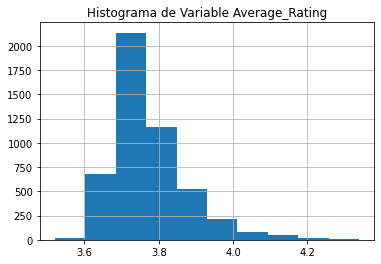

In [13]:
plt.title('Histograma de Variable Average_Rating')
plt.hist(dflimpio['Average_Rating'])
plt.grid(True)
plt.show()

# Conclusiones
Al analizar el histograma se puede observar que la mayoria de los albums tienen un Average Rating entre 3.6 y 3.8


# 5. Variable de mayor correlación

In [14]:
dflimpio.corr()

,Ranking,Average_Rating,Number_of_Reviews
Ranking,1.000000,-0.846239,-0.433054
Average_Rating,-0.846239,1.000000,0.466814
Number_of_Reviews,-0.433054,0.466814,1.000000


# Conclusiones 
Se puede observar que para la variable de interés (Average Ranking) se tiene una mayor correlación con Number of Reviews.
(Corr = 0.46)
Se debe construir una función para el pronstico 
Average Rating = B0 + B1 * budget


# 6. Correlación entre variable dependiente e independiente

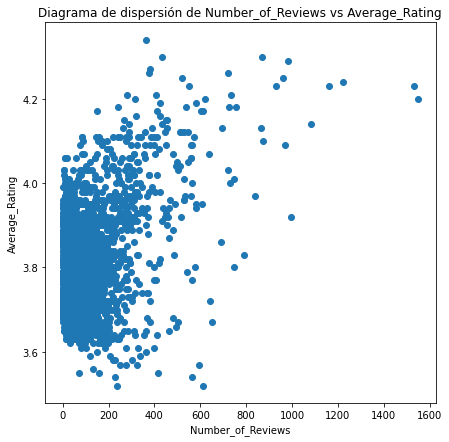

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(x = dflimpio['Number_of_Reviews'], y = dflimpio['Average_Rating'])
plt.xlabel("Number_of_Reviews")
plt.ylabel("Average_Rating")
plt.title("Diagrama de dispersión de Number_of_Reviews vs Average_Rating")
plt.show()

# Conclusiones
Se puede oberservar que existe una tendencia creciente, por lo que esta es una correlación positiva.

# 7. Valores atípicos Number of Reviews

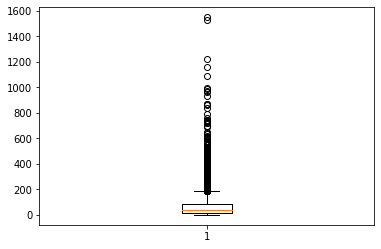

In [16]:
plt.boxplot(dflimpio['Number_of_Reviews'])
plt.show()

# Conclusiones
Se observan una gran variedad de valores atípicos,
Se pueden tomar a consideración estos valores, ya que se obtuvo un valor bajo de correlación

# 8. Análisis de regresión


Correlación de un 46%%, buena medición, se procede con el análisis

In [17]:
NumberofReviewsAverageRating = dflimpio[['Number_of_Reviews','Average_Rating']]

model_ols = sm.OLS.from_formula("Average_Rating ~ Number_of_Reviews", data=NumberofReviewsAverageRating)

result = model_ols.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:         Average_Rating   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     1361.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          5.18e-263
Time:                        13:57:08   Log-Likelihood:                 4922.8
No. Observations:                4886   AIC:                            -9842.
Df Residuals:                    4884   BIC:                            -9829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.7410      0.00

# Conclusiones 

In [ ]:
,

# 9. Grafica de dispersión de observaciones y predicción.


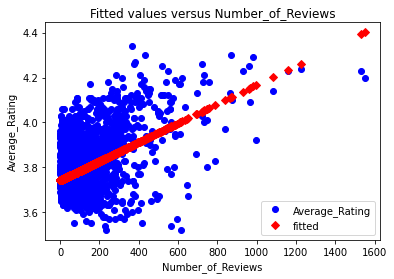

In [18]:
sm.graphics.plot_fit(result,1, vlines=False);


# Conclusiones